# Project-Based Internship : ID/X Partners x Rakamin

# Credit Risk Prediction Model

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Understanding
---

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
nums = df.select_dtypes(include=['int64', 'float64']).columns
cats = df.select_dtypes(include=['object']).columns

In [6]:
df[nums].describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [7]:
df[cats].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


**Data Understanding:**

- There are **466285 rows** and **75 columns** in the dataset.
- There are **53 numerical** columns and **22 categorical** columns in the dataset.
- There are **many null values** in the dataset.
- Some features have no values and filled with null values.
- Some features have unique values as much as rows.
- There is indication of skewed data distribution in some features because of the mean and median are very different, like in feature 'annual_inc', 'total_pymnt', and 'total_pymnt_inv', etc.

### Handling Missing Values

Before EDA, some of the missing values needs to be handled to reduce the number of features. So, the **features that has no values** and the **features that only have unique values** needs to be dropped.

In [8]:
df1 = df.copy()

**Dropping features with no values**

In [9]:
null_only = df1.columns[df1.isnull().all()]
null_only

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [10]:
df1.drop(columns=null_only, axis=1, inplace=True)

**Recheck null values**

In [11]:
df1.isnull().mean().sort_values(ascending=False)

mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
desc                           0.729820
mths_since_last_delinq         0.536906
next_pymnt_d                   0.487286
tot_cur_bal                    0.150715
tot_coll_amt                   0.150715
total_rev_hi_lim               0.150715
emp_title                      0.059166
emp_length                     0.045054
last_pymnt_d                   0.000806
revol_util                     0.000729
collections_12_mths_ex_med     0.000311
last_credit_pull_d             0.000090
pub_rec                        0.000062
inq_last_6mths                 0.000062
delinq_2yrs                    0.000062
open_acc                       0.000062
earliest_cr_line               0.000062
acc_now_delinq                 0.000062
total_acc                      0.000062
title                          0.000045
annual_inc                     0.000009
total_rec_int                  0.000000
total_rec_late_fee             0.000000


There are still some features that have almost or more than 50% of missing values, so it's better for these features to be dropped.

In [12]:
df1.drop(['desc','mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','next_pymnt_d'], axis=1, inplace=True)

**Dropping features with only unique values**

In [13]:
unique_only = [col for col in df1.columns if df1[col].is_unique]
unique_only

['Unnamed: 0', 'id', 'member_id', 'url']

In [14]:
df1.drop(columns=unique_only, axis=1, inplace=True)

**Dropping features with unique values**

In [15]:
nums1 = df1.select_dtypes(include=['int64', 'float64']).columns
cats1 = df1.select_dtypes(include=['object']).columns

In [16]:
# Categorical Features
df1[cats1].nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64

In [17]:
# Numerical Features
df1[nums1].nunique()

loan_amnt                       1352
funded_amnt                     1354
funded_amnt_inv                 9854
int_rate                         506
installment                    55622
annual_inc                     31901
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
out_prncp_inv                 141189
total_pymnt                   351609
total_pymnt_inv               347659
total_rec_prncp               172713
total_rec_int                 270249
total_rec_late_fee              5808
recoveries                     22773
collection_recovery_fee        20275
last_pymnt_amnt               198194
collections_12_mths_ex_med         9
policy_code                        1
acc_now_delinq                     6
t

Dropped because too many unique values:
- emp_title
- title
- zip_code
- earliest_cr_line
- last_credit_pull_d

Dropped because only have one unique value:
- application_type
- policy_code

In [18]:
df1.drop(['emp_title',
    'title','zip_code',
    'earliest_cr_line',
    'last_credit_pull_d',
    'application_type',
    'policy_code'], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

**Defining target variable**

In [19]:
df1['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

The values in 'loan_status' would be the target variable, so encoding is needed to convert the values into binary values of 0 for bad credit and 1 for good credit. 
The values would be classified as such:
- Current: good credit (1)
- Fully Paid: good credit (1)
- Charged Off: bad credit (0)
- Late (31-120 days): bad credit (0)
- In Grace Period: bad credit (0)
- Does not meet the credit policy. Status:Fully Paid: good credit (1)
- Late (16-30 days): bad credit (0)
- Default: bad credit (0)
- Does not meet the credit policy. Status:Charged Off: bad credit (0)

In [20]:
# Mapping loan_status to bad credit (0) and good credit (1)
loan_status_map = {
    'Fully Paid': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'In Grace Period': 1,
    'Does not meet the credit policy. Status:Charged Off': 1
}

df1['loan_status'] = df1['loan_status'].map(loan_status_map)

In [21]:
# Check the distribution of good and bad credit
df1['loan_status'].value_counts()

loan_status
0.0    186727
1.0     55332
Name: count, dtype: int64

**Data Distribution**

In [22]:
df2 = df1.copy()

In [23]:
nums2 = df2.select_dtypes(include=['int64', 'float64']).columns
cats2 = df2.select_dtypes(include=['object']).columns

In [24]:
df2[nums2].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,242059.000000,466285.000000,466256.000000,466256.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,0.228589,17.218758,0.284678,0.804745,...,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,0.419925,7.851121,0.797365,1.091598,...,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,0.000000,11.360000,0.000000,0.000000,...,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,0.000000,16.870000,0.000000,0.000000,...,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,0.000000,22.780000,0.000000,1.000000,...,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,1.000000,39.990000,29.000000,33.000000,...,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


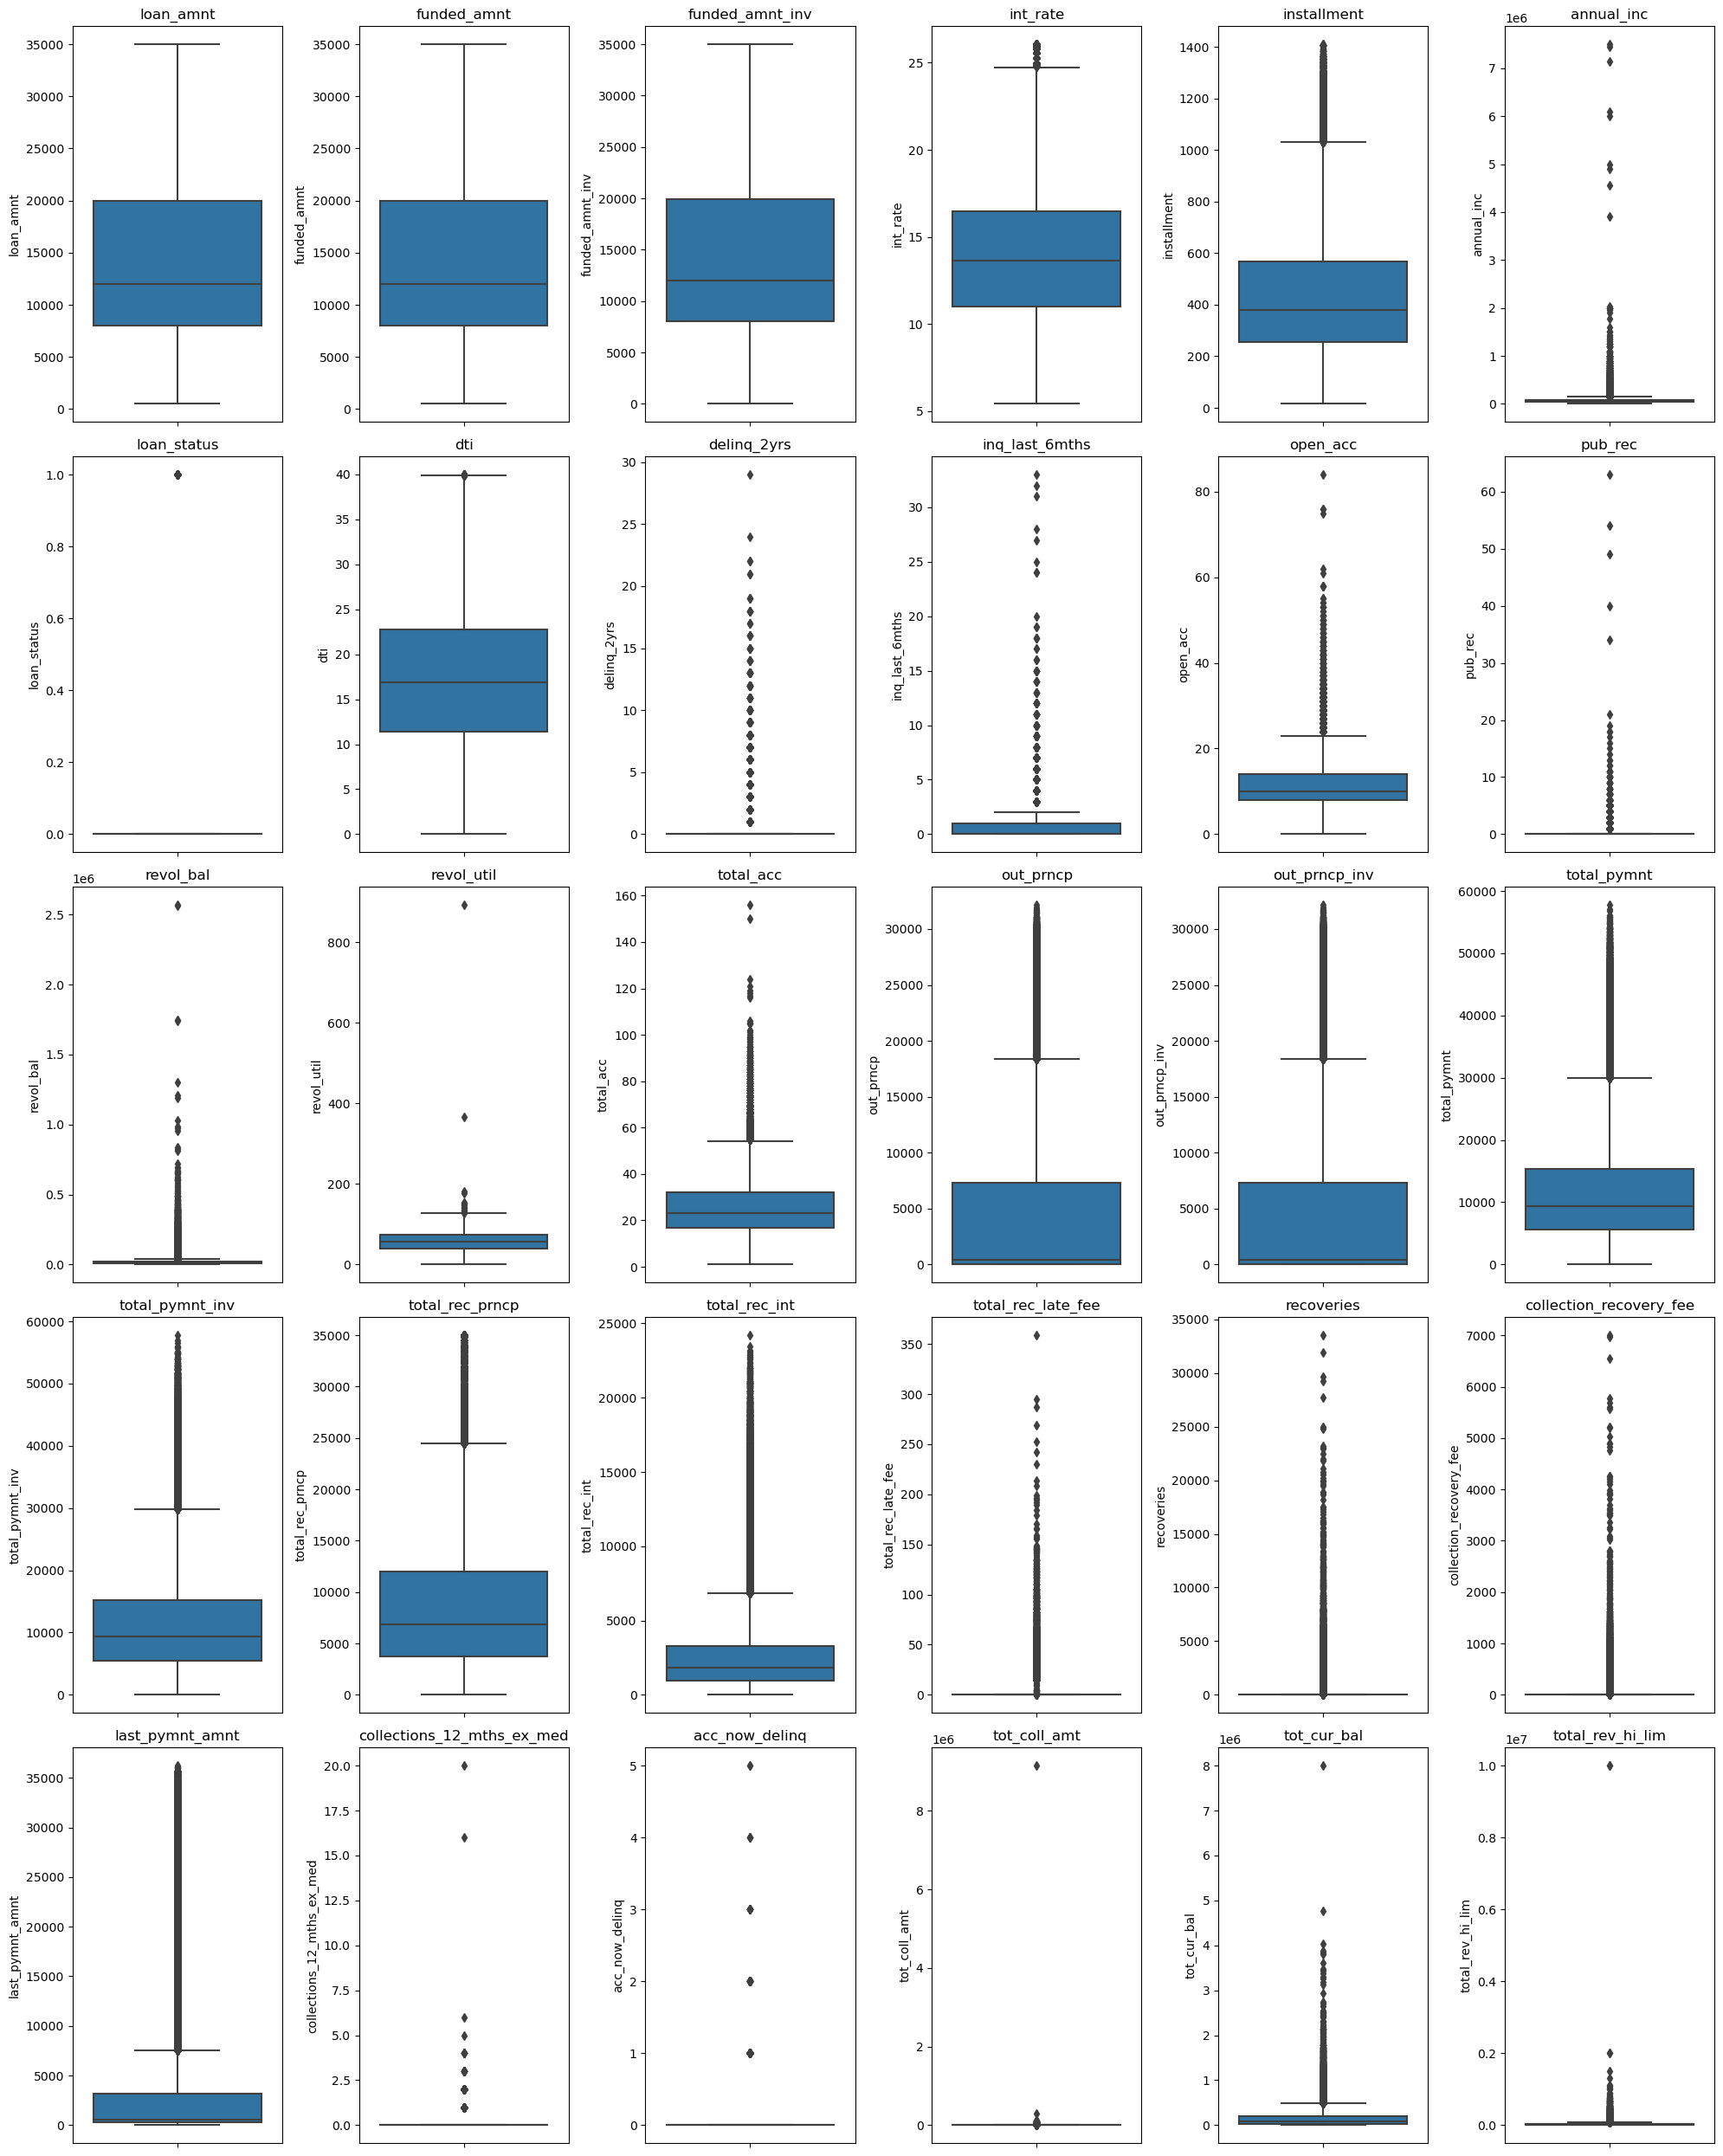

In [25]:
# Boxplots
plt.figure(figsize=(20, 25))
for i, var in enumerate(nums2):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(y=df2[var])
    plt.title(f'{var}')
plt.tight_layout()
plt.show()

- Most features have outliers.
- Features that don't have outliers are:
    - loan_amnt
    - funded_amnt
    - funded_amnt_inv
    - dti

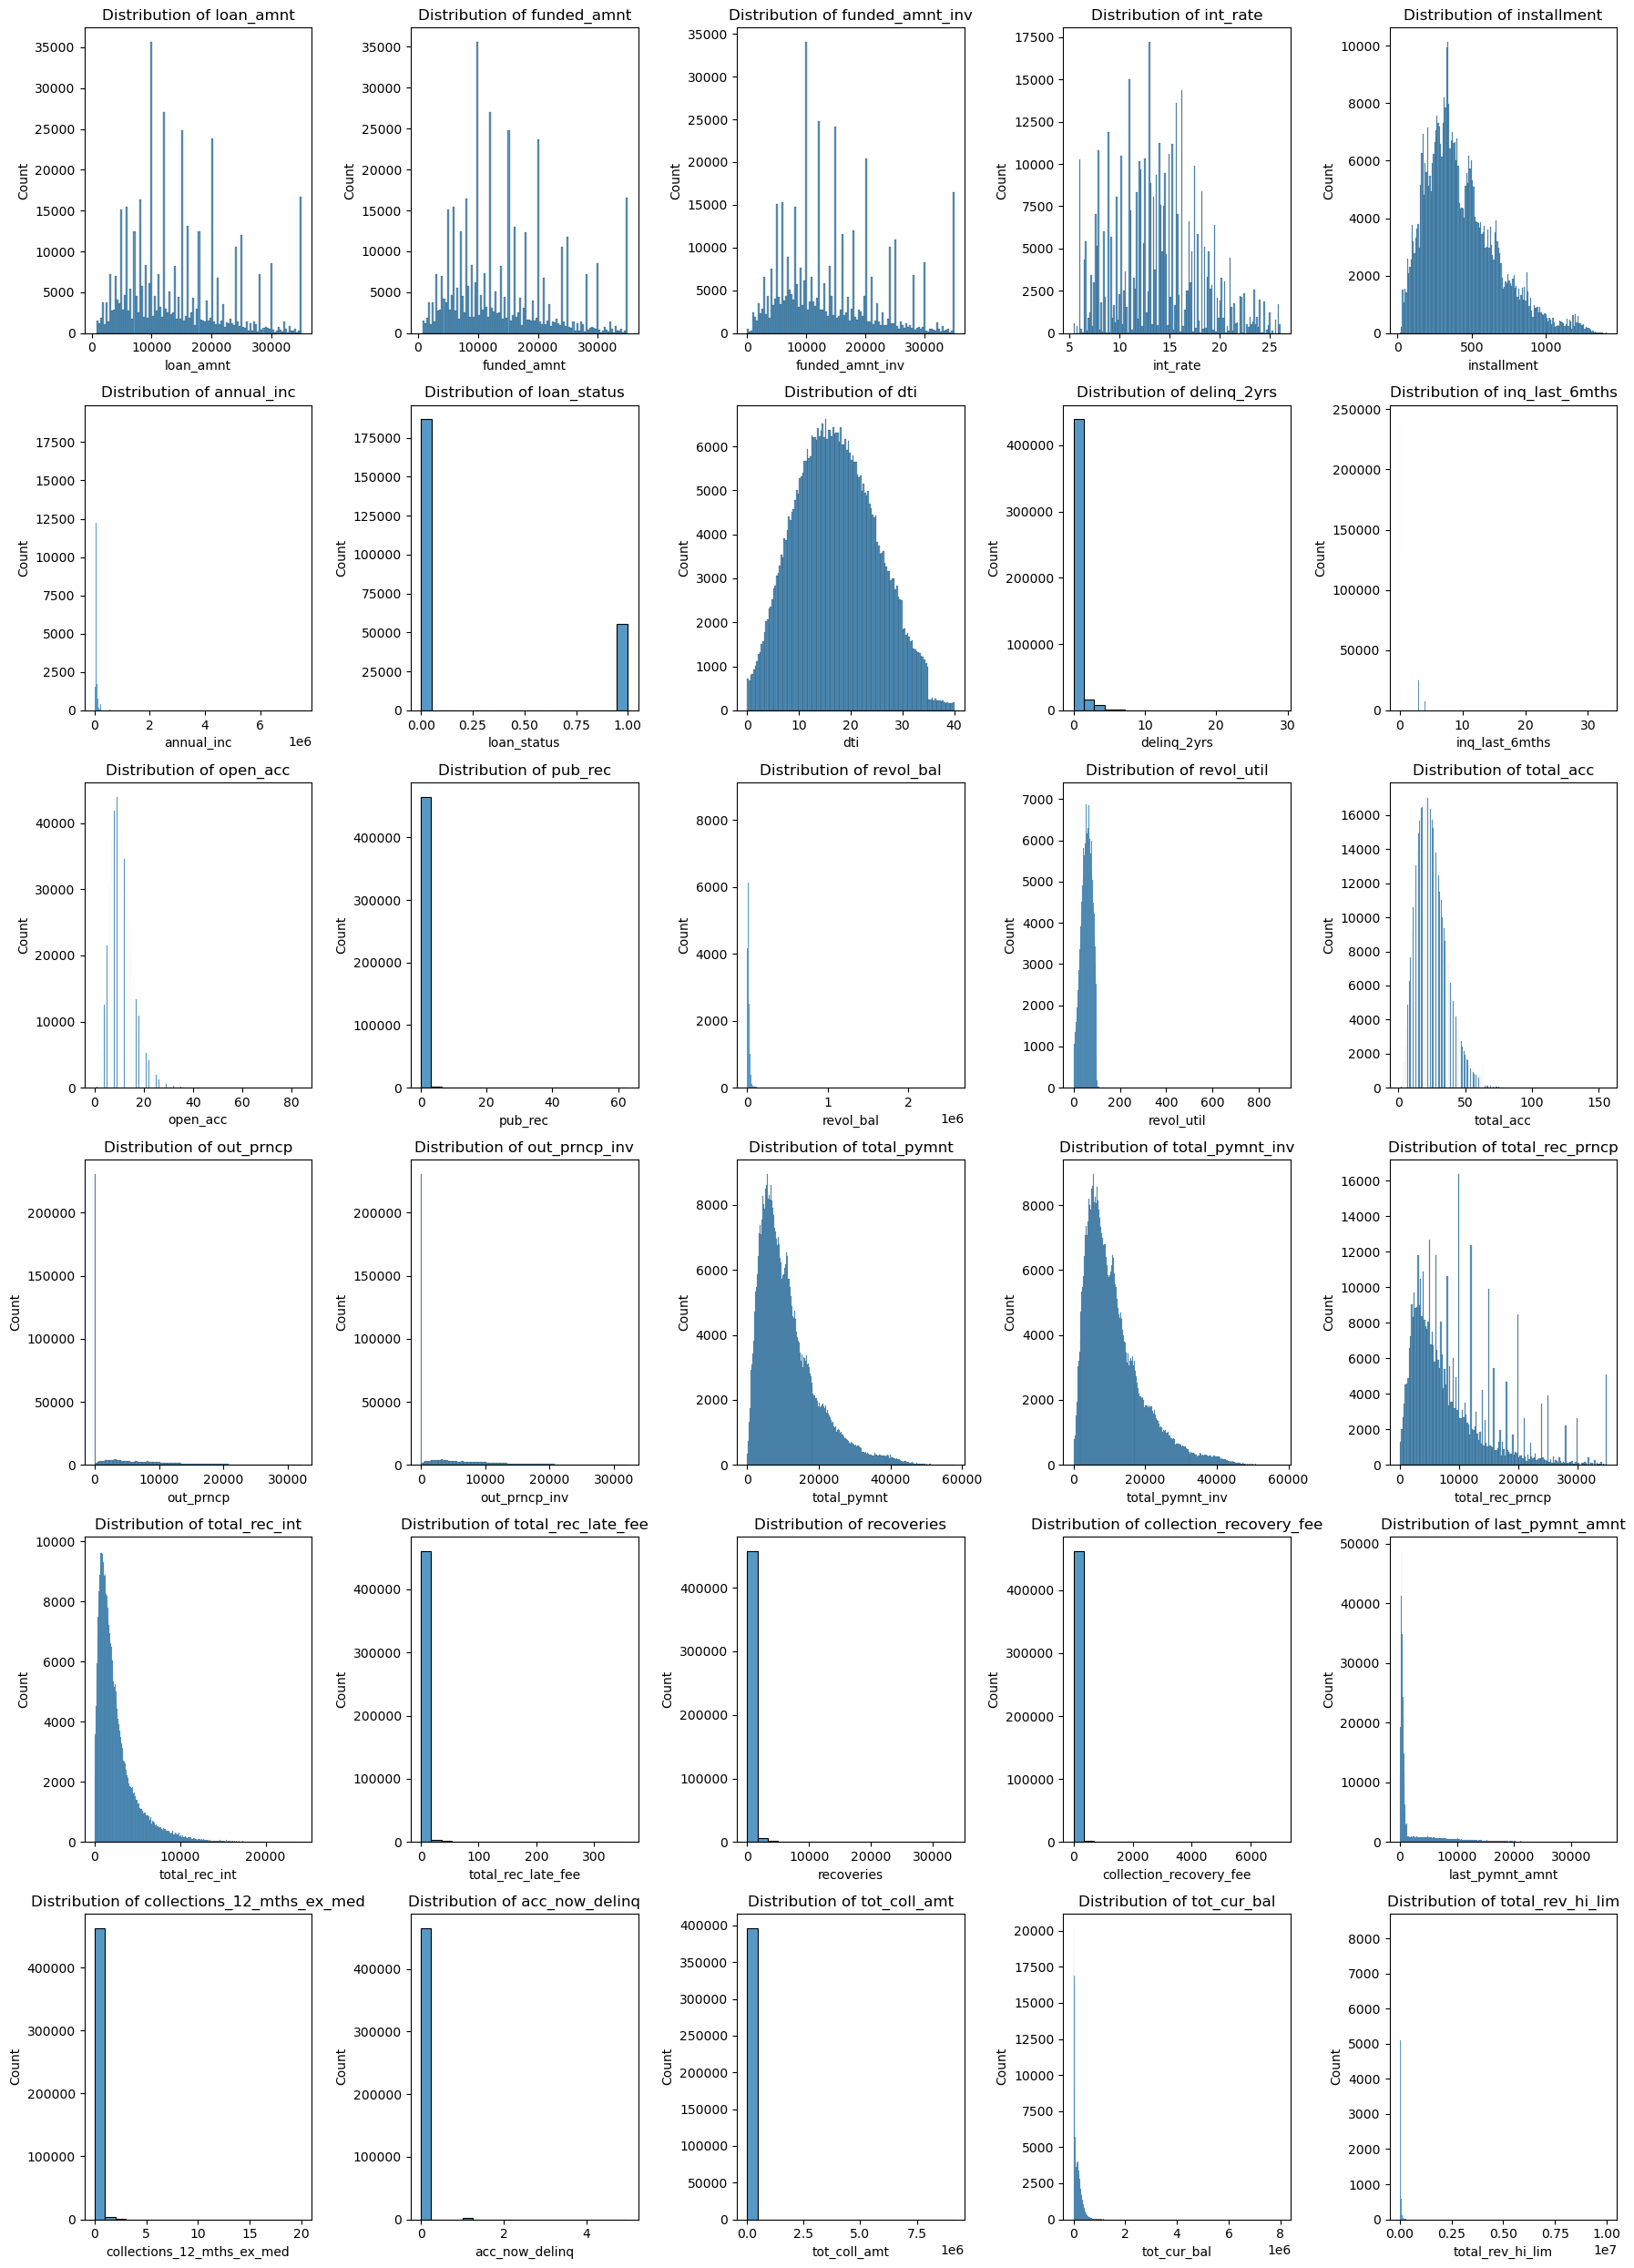

In [26]:
# Histograms
plt.figure(figsize=(18, 25))
for i, var in enumerate(nums2):
    plt.subplot(6, 5, i + 1)
    sns.histplot(df2[var])
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

- Most features have skewed distribution.
- Features that have almost normal distribution are:
    - loan_amnt
    - funded_amnt
    - funded_amnt_inv
    - int_rate
    - dti

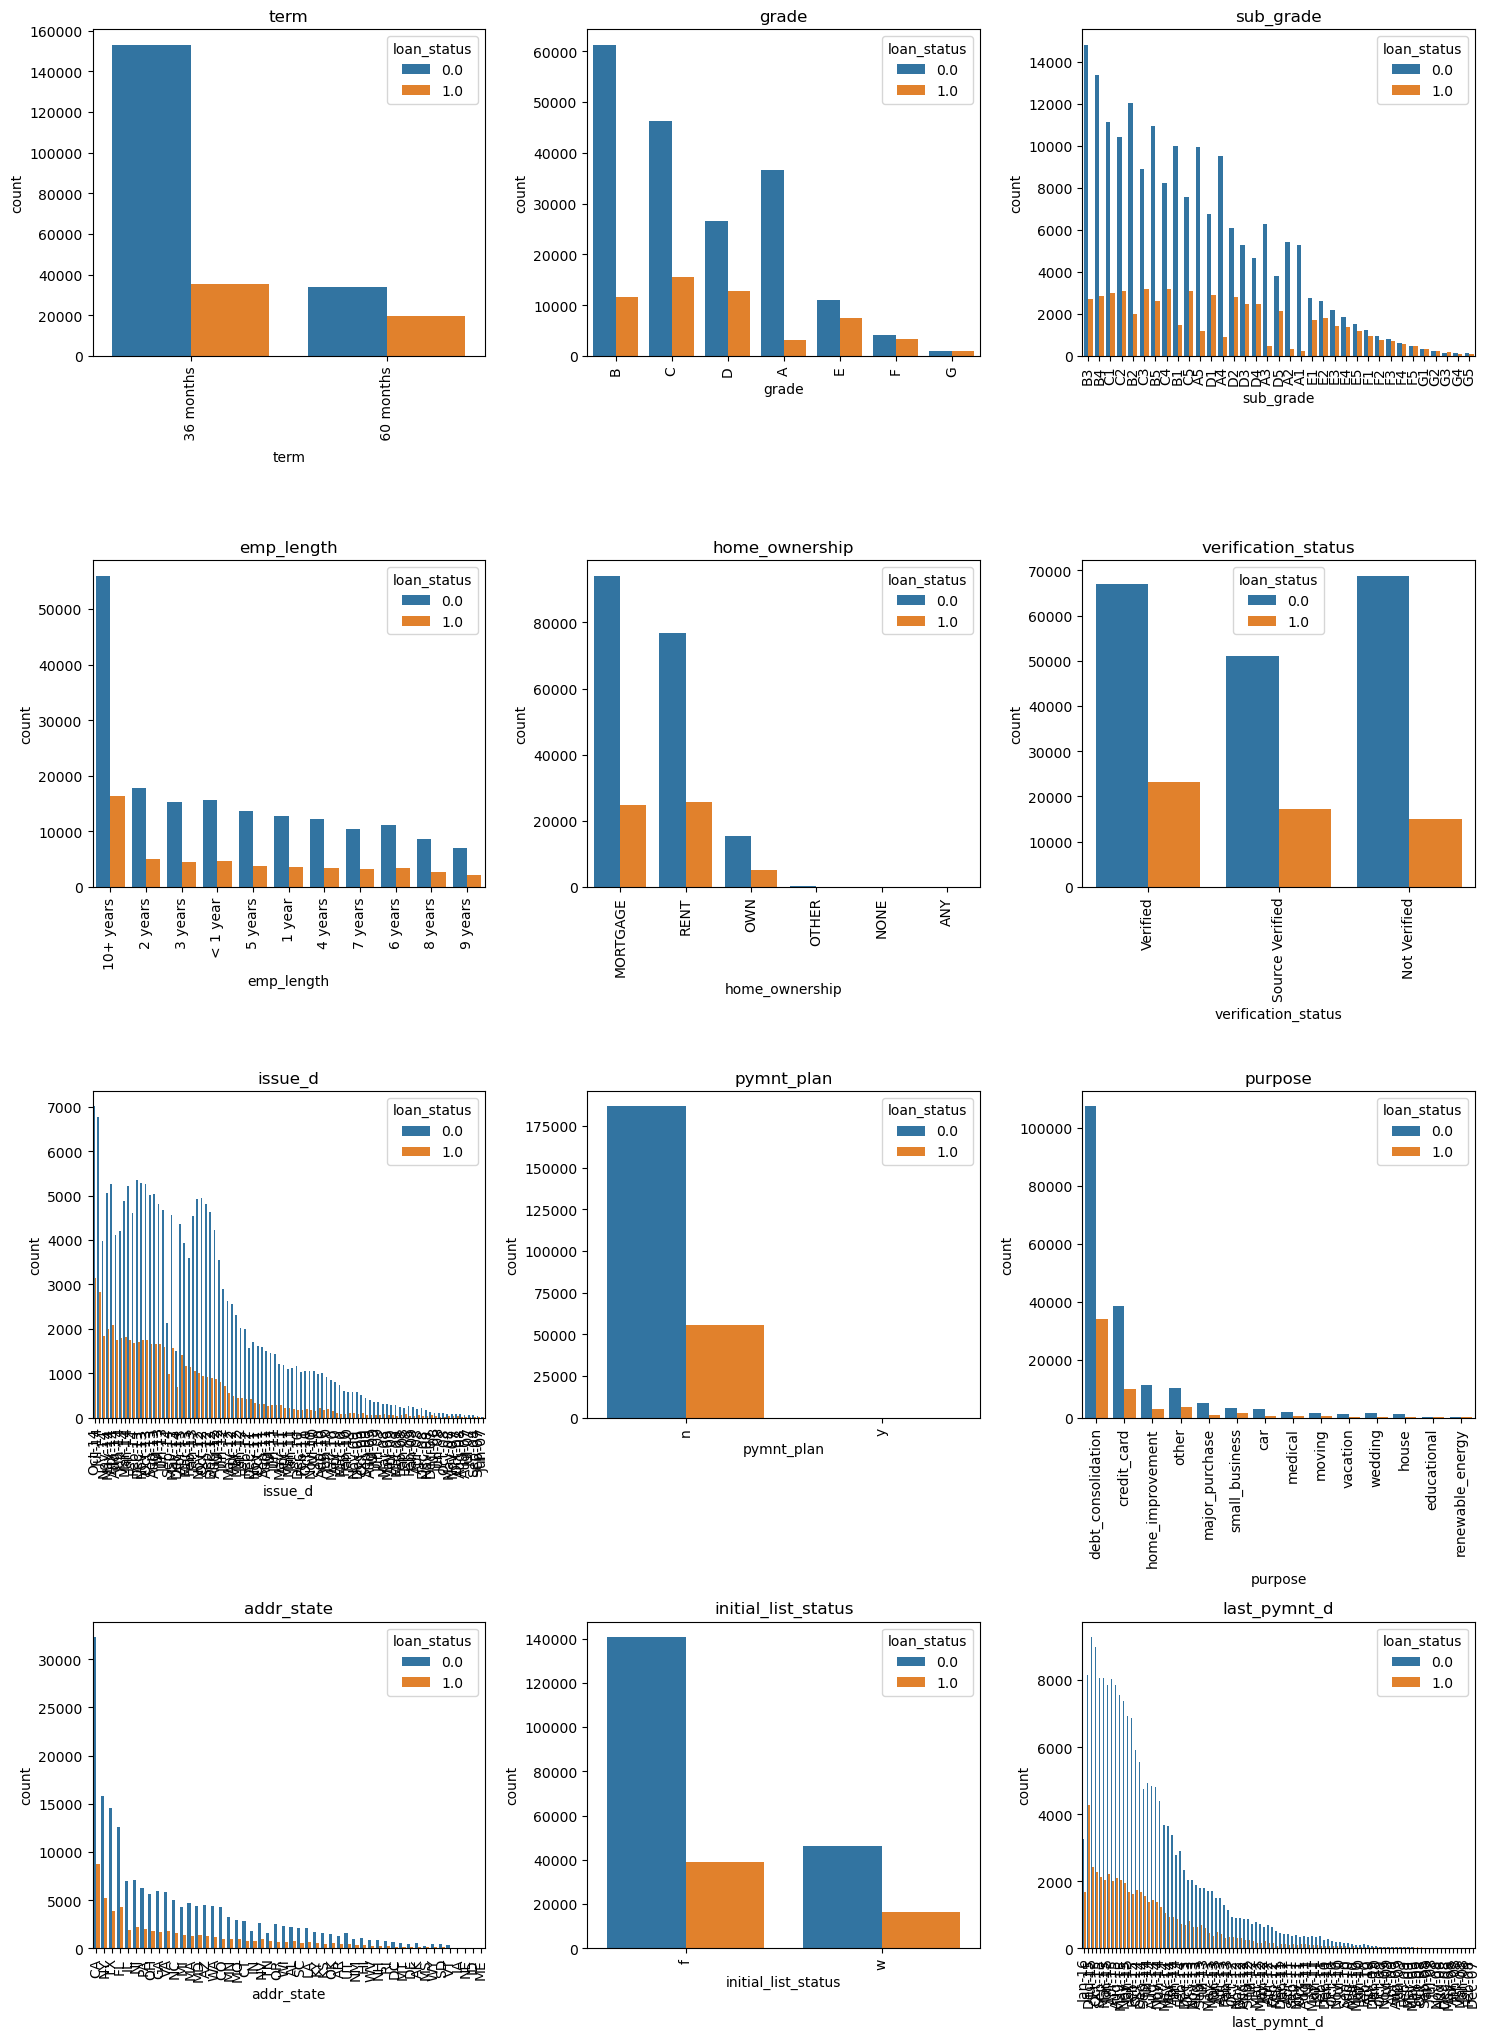

In [28]:
plt.figure(figsize=(15, 25))

# Loop through categorical features and create a subplot for each
for i, var in enumerate(cats2):
    plt.subplot(5, 3, i + 1)
    
    # Create a count plot with hue
    sns.countplot(x=var, data=df2, hue='loan_status', order=df2[var].value_counts().index)
    
    # Set title for each subplot
    plt.title(f'{var}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

# Adjust layout to ensure no overlap
plt.tight_layout()
plt.show()


- Loans with a 36-month term have a higher proportion of good credit (1.0) compared to 60-month term loans.
- Higher grades (A, B) are associated with a greater proportion of good credit, while lower grades (F, G) have more bad credit loans.
- The proportion of good credit increases with longer employment lengths (10+ years).
- Customer who have ownership of their home or have mortgages show higher proportion of good credit.
- Loan purposes like debt consolidation and credit card refinancing, have a relatively higher proportion of bad credit loans.

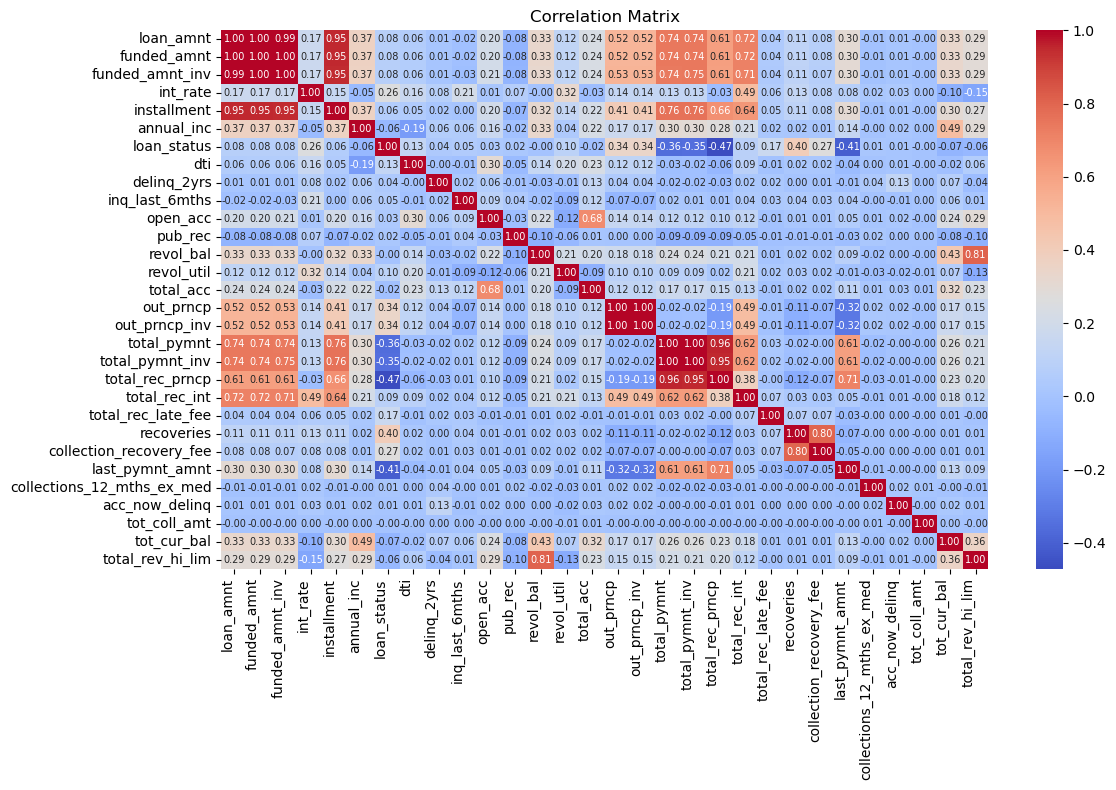

In [29]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df2[nums2].corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 7})
plt.title('Correlation Matrix')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Some features that show high correlation are:
- loan_amnt
- funded_amnt
- funded_amnt_inv
- total_pymnt
- total_pymnt_inv
- recoveries
- revol_bal
- out_prncp
- out_prncp_inv
- total_rec_prncp
- total_rec_int
- last_pymnt_amnt

## Data Preprocessing

**Handling missing values**

In [30]:
df3 = df2.copy()

In [31]:
df3.isnull().sum().sort_values(ascending=False)

loan_status                   224226
total_rev_hi_lim               70276
tot_cur_bal                    70276
tot_coll_amt                   70276
emp_length                     21008
last_pymnt_d                     376
revol_util                       340
collections_12_mths_ex_med       145
acc_now_delinq                    29
total_acc                         29
open_acc                          29
inq_last_6mths                    29
delinq_2yrs                       29
pub_rec                           29
annual_inc                         4
pymnt_plan                         0
total_pymnt_inv                    0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
last_pymnt_amnt                    0
grade                              0
collection_recovery_fee            0
recoveries                         0
total_rec_late_fee                 0
total_rec_int                      0
t

For the features `total_rev_hi_lim`,`tot_cur_bal`,`tot_coll_amt`,`emp_length`, imputation is needed since the are a lot of null values.
- fill null values with mean for numerical features.
- fill null values with mode for categorical features

In [32]:
# For numerical columns, fill with mean
df3['total_rev_hi_lim'].fillna(df3['total_rev_hi_lim'].mean(), inplace=True)
df3['tot_cur_bal'].fillna(df3['tot_cur_bal'].mean(), inplace=True)
df3['tot_coll_amt'].fillna(df3['tot_coll_amt'].mean(), inplace=True)

# For categorical columns, fill with mode
df3['emp_length'].fillna(df3['emp_length'].mode()[0], inplace=True)

Drop the rest of the null values because there are less than 1%.

In [33]:
# Drop the rest of the null values
df3.dropna(inplace=True)

In [34]:
df3.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

In [35]:
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.00,0.00,0.00,Jan-15,171.62,0.0,0.0,191.913517,138801.713385,30379.087771
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0.00,117.08,1.11,Apr-13,119.66,0.0,0.0,191.913517,138801.713385,30379.087771
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.00,0.00,0.00,Jun-14,649.91,0.0,0.0,191.913517,138801.713385,30379.087771
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,16.97,0.00,0.00,Jan-15,357.48,0.0,0.0,191.913517,138801.713385,30379.087771
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0.00,0.00,0.00,Jan-15,161.03,0.0,0.0,191.913517,138801.713385,30379.087771


**Duplicated data**

In [36]:
df3.duplicated().sum()

0

There is no duplicated data

**Removing Outliers**

In [37]:
nums3 = df3.select_dtypes(include=['int64', 'float64']).columns
cats3 = df3.select_dtypes(include=['object']).columns

In [38]:
# Ensure nums3 is a DataFrame
if isinstance(nums3, pd.Index):
    nums3 = df3[nums3]

In [39]:
from scipy.stats import zscore

# Calculate Z-scores for each numerical column
z_scores = nums3.apply(zscore)

# Define a threshold for severe outliers
threshold = 3

# Find severe outliers in each column
severe_outliers = (abs(z_scores) > threshold).sum()

# Print columns with severe outliers directly
column_outliers = severe_outliers[severe_outliers > 0]
column_outliers


installment                   3291
annual_inc                    2341
dti                             66
delinq_2yrs                   4572
inq_last_6mths                3035
open_acc                      2377
pub_rec                       3115
revol_bal                     2940
revol_util                      10
total_acc                     2321
out_prncp                     6067
out_prncp_inv                 6067
total_pymnt                   2779
total_pymnt_inv               2780
total_rec_int                 5370
total_rec_late_fee            4251
recoveries                    5478
collection_recovery_fee       4057
last_pymnt_amnt               4320
collections_12_mths_ex_med    1355
acc_now_delinq                 653
tot_coll_amt                    21
tot_cur_bal                   3788
total_rev_hi_lim              3551
dtype: int64

In [40]:
# Define a function to remove outliers based on Z-scores
def remove_outliers(df3, threshold=3):
    z_scores = nums3.apply(zscore)
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return df3[filtered_entries]

# Apply the function
df4 = remove_outliers(df3)

In [41]:
nums4 = df4.select_dtypes(include=['int64', 'float64']).columns
cats4 = df4.select_dtypes(include=['object']).columns

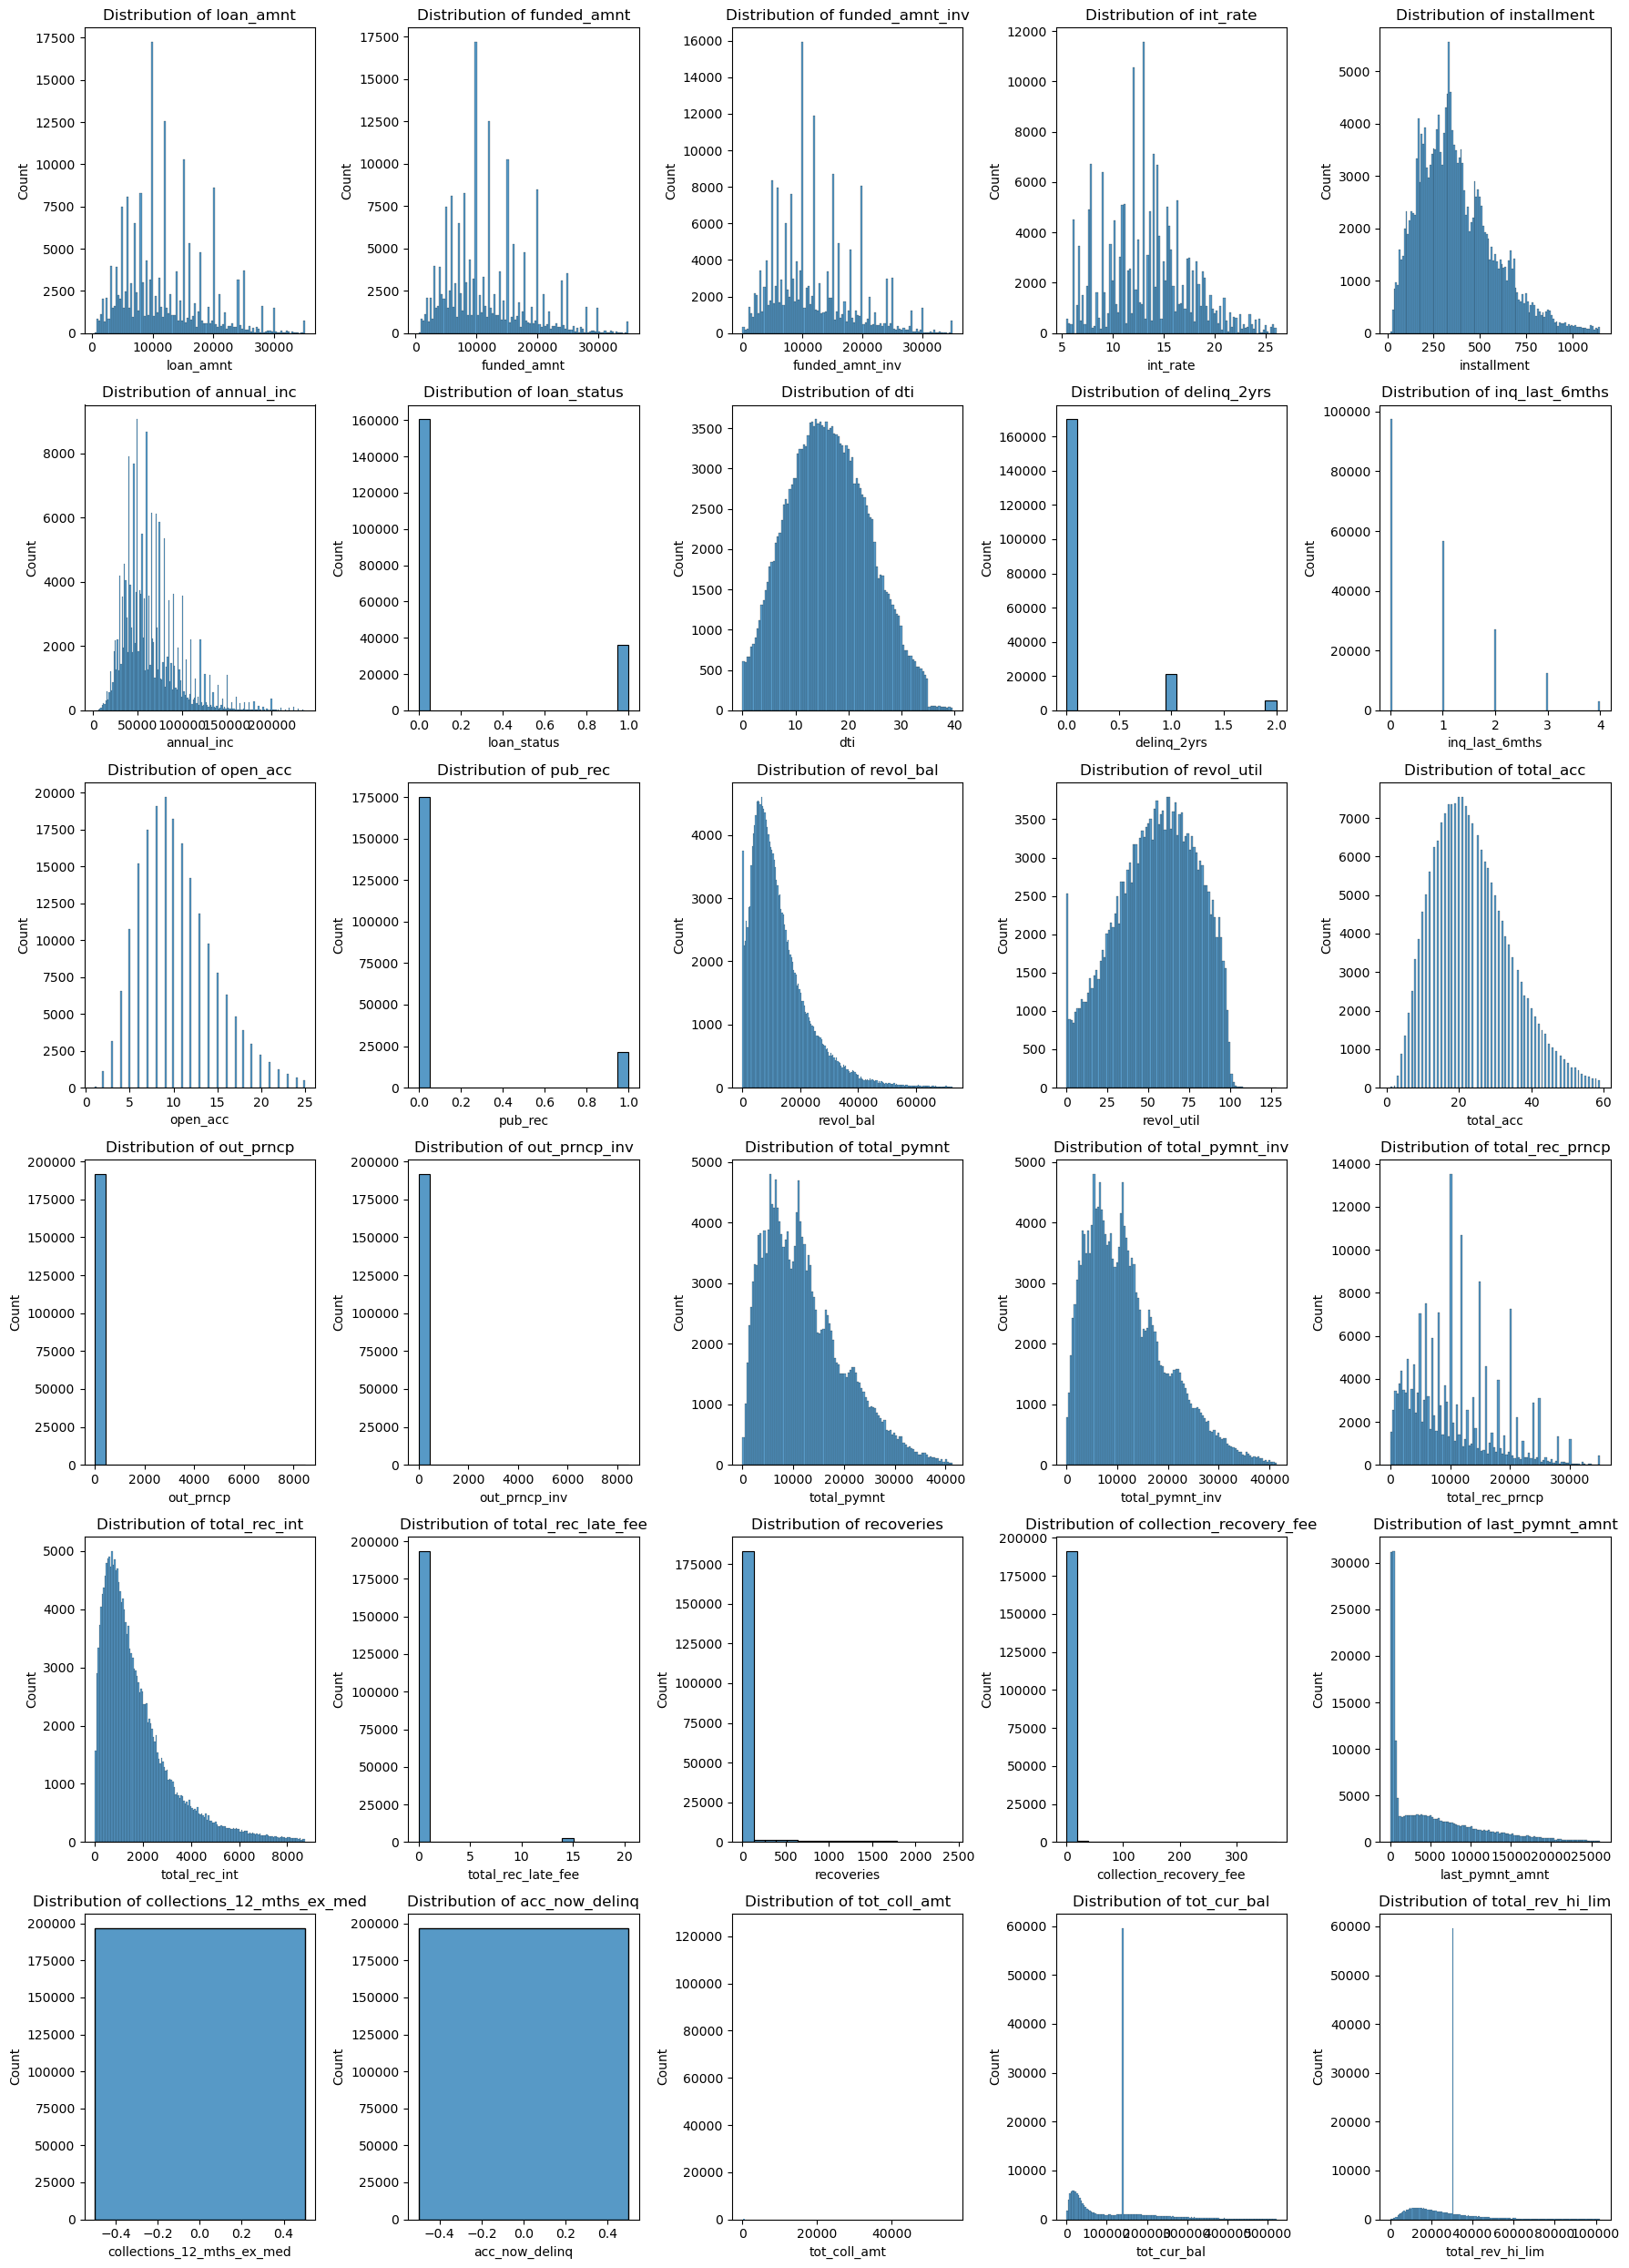

In [42]:
plt.figure(figsize=(18, 25))
for i, var in enumerate(nums4):
    plt.subplot(6, 5, i + 1)
    sns.histplot(df4[var])
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

The distribution of the data is better after the outliers are removed.

**Standardization**

In [43]:
dfs = df4.copy()

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs[nums4] = scaler.fit_transform(dfs[nums4])

In [45]:
dfs.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.966670e+05,1.966670e+05,1.966670e+05,1.966670e+05,1.966670e+05,1.966670e+05,1.966670e+05,1.966670e+05,1.966670e+05,1.966670e+05,...,1.966670e+05,1.966670e+05,1.966670e+05,1.966670e+05,1.966670e+05,196667.0,196667.0,1.966670e+05,1.966670e+05,1.966670e+05
mean,-1.741429e-17,1.154690e-16,2.094050e-16,-9.263535e-17,-4.582993e-17,3.738472e-16,-1.291620e-18,8.061560e-17,-1.436589e-17,6.828425e-18,...,1.651106e-17,-3.911441e-17,-1.176006e-16,4.279507e-17,6.091388e-17,0.0,0.0,-1.940817e-17,-2.116654e-16,3.966719e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.0,0.0,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.712439e+00,-1.714430e+00,-1.765912e+00,-1.911330e+00,-1.759738e+00,-1.977963e+00,-4.752140e-01,-2.130338e+00,-3.729234e-01,-8.185710e-01,...,-1.166388e+00,-1.301876e-01,-2.317303e-01,-1.502378e-01,-8.846402e-01,0.0,0.0,-1.509158e-01,-1.270854e+00,-1.799913e+00
25%,-7.453922e-01,-7.424322e-01,-7.677669e-01,-7.241614e-01,-7.489361e-01,-7.163872e-01,-4.752140e-01,-7.446014e-01,-3.729234e-01,-8.185710e-01,...,-7.080441e-01,-1.301876e-01,-2.317303e-01,-1.502378e-01,-8.179520e-01,0.0,0.0,-1.509158e-01,-8.979467e-01,-7.361975e-01
50%,-2.395521e-01,-2.340024e-01,-2.575211e-01,-7.074024e-02,-1.721319e-01,-1.816080e-01,-4.752140e-01,-3.998970e-02,-3.729234e-01,1.829401e-01,...,-2.894242e-01,-1.301876e-01,-2.317303e-01,-1.502378e-01,-3.679449e-01,0.0,0.0,-1.509158e-01,1.781582e-01,2.462153e-01
75%,5.935962e-01,6.034115e-01,6.139936e-01,6.185832e-01,5.710111e-01,4.790015e-01,-4.752140e-01,7.089865e-01,-3.729234e-01,1.829401e-01,...,3.869827e-01,-1.301876e-01,-2.317303e-01,-1.502378e-01,5.326597e-01,0.0,0.0,4.604647e-02,1.781582e-01,2.515737e-01
max,3.420350e+00,3.444637e+00,3.448278e+00,3.028822e+00,3.787172e+00,5.417844e+00,2.104315e+00,3.034205e+00,4.152947e+00,3.187473e+00,...,4.534546e+00,9.958661e+00,8.072538e+00,1.177303e+01,3.595083e+00,0.0,0.0,5.756244e+01,4.166518e+00,5.110853e+00


**Feature Encoding**

Changing data types:
- `issue_d`: to datetime
- `last_pymnt_d`: to datetime

Make a new feature `repayment_months` to calculate the repayment duration in months that get extracted from 'issue_d' and 'last_pymnt_d', and then both features would later be dropped.

In [46]:
dfs[cats4].describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,initial_list_status,last_pymnt_d
count,196667,196667,196667,196667,196667,196667,196667,196667,196667,196667,196667,196667
unique,2,7,35,11,6,3,89,2,14,50,2,98
top,36 months,B,B3,10+ years,MORTGAGE,Not Verified,Oct-14,n,debt_consolidation,CA,f,Jul-15
freq,162082,64520,15621,63935,91337,76365,7340,196665,113417,33679,148406,9772


In [82]:
dfe = dfs.copy()

In [83]:
dfe['issue_d'] = pd.to_datetime(dfe['issue_d'], format='%b-%y')
dfe['last_pymnt_d'] = pd.to_datetime(dfe['last_pymnt_d'], format='%b-%y')

In [84]:
from dateutil.relativedelta import relativedelta

def calculate_months(start_date, end_date):
    delta = relativedelta(end_date, start_date)
    return delta.years * 12 + delta.months

dfe['repayment_months'] = dfe.apply(lambda row: calculate_months(row['issue_d'], row['last_pymnt_d']), axis=1)

Label Encoding

In [85]:
dfe['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [86]:
# Mapping grade to numeric values
grade_map = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
}

dfe['grade'] = dfe['grade'].map(grade_map)

In [87]:
dfe['emp_length'].unique()

array(['10+ years', '3 years', '9 years', '4 years', '< 1 year',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [88]:
# Mapping emp_length to numeric values
emp_length_map = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 6,
}

dfe['emp_length'] = dfe['emp_length'].map(emp_length_map)

In [89]:
dfe['verification_status'].unique()

array(['Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [90]:
# Mapping verification_status to numeric values
verification_map = {
    'Verified': 1,
    'Source Verified': 1,
    'Not Verified': 0
}

dfe['verification_status'] = dfe['verification_status'].map(verification_map)

In [91]:
dfe['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [92]:
# Mapping pymnt_plan to numeric values
pymnt_plan_map = {
    'y': 0,
    'n': 1
}

dfe['pymnt_plan'] = dfe['pymnt_plan'].map(pymnt_plan_map)

In [93]:
dfe['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [94]:
# Mapping home_ownership to numeric values
home_ownership_map = {
    'OWN': 1,
    'MORTGAGE': 1,
    'RENT': 0,
    'OTHER': 0,
    'NONE': 0,
    'ANY': 0
}

dfe['home_ownership'] = dfe['home_ownership'].map(home_ownership_map)

In [95]:
dfe['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [96]:
# Mapping initial_list_status to numeric values
initial_list_status_map = {
    'w': 0,
    'f': 1
}

dfe['initial_list_status'] = dfe['initial_list_status'].map(initial_list_status_map)

In [97]:
dfe['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [98]:
# Mapping term to numeric values
term_map = {
    ' 60 months': 0,
    ' 36 months': 1
}

dfe['term'] = dfe['term'].map(term_map)

One hot Encoding

In [99]:
dfe['purpose'].unique()

array(['credit_card', 'small_business', 'other', 'wedding', 'car',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'house', 'vacation', 'renewable_energy',
       'educational'], dtype=object)

In [100]:
from sklearn.preprocessing import OneHotEncoder

dfe = pd.get_dummies(dfe, columns=['purpose'], drop_first=True)

In [101]:
# Mengubah isi True dan False menjadi 0 dan 1
for col in dfe.columns:
    if dfe[col].dtype == 'bool':
        dfe[col] = dfe[col].astype(int)

In [102]:
dfe.drop(['sub_grade','addr_state','issue_d','last_pymnt_d'], axis=1, inplace=True)

In [103]:
dfe.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,-1.042945,-1.041509,-1.024752,1,-0.659537,-1.039589,1,6,0,-1.282624,...,0,0,0,0,0,0,0,0,0,0
2,-1.429764,-1.430308,-1.408367,1,0.611403,-1.423831,2,6,0,-1.652188,...,0,0,0,0,0,0,0,1,0,0
3,-0.299063,-0.293818,-0.276143,1,0.020212,-0.176388,2,6,0,-0.489892,...,0,0,0,0,0,1,0,0,0,0
5,-1.042945,-1.041509,-1.021028,1,-1.317745,-1.070948,0,3,0,-0.905133,...,0,0,0,0,0,0,0,0,0,1
7,-1.340498,-1.340585,-1.318981,1,1.252857,-1.301034,4,9,0,-0.527642,...,0,0,0,0,0,0,0,0,0,0


In [104]:
dfe.shape

(196667, 51)

**Train test split**

In [105]:
from sklearn.model_selection import train_test_split

X = dfe.drop('loan_status', axis=1)
y = dfe['loan_status']

# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
threshold = 0.0
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

In [107]:
y_train.value_counts()

loan_status
0    112182
1     25484
Name: count, dtype: int64

**Class imbalance**<br>
Since the class imbalance is quite high, resampling is requires. SMOTE will be used for oversampling and make the '1' class to be 60% of the '0' class.
- 0 : 112182
- 1 : 60% x '0' class = 0.6 x 112182 = 67309

In [108]:
from imblearn.over_sampling import SMOTE

# Set the sampling strategy to achieve the desired 60% ratio
smote = SMOTE(sampling_strategy=67309/112182, random_state=42)

X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X_train, y_train)

# Check the new class distribution
y_over_SMOTE.value_counts()

loan_status
0    112182
1     67309
Name: count, dtype: int64

## Modeling

Metric that will be used for the modeling is ROC-AUC because it has better performance especially with imbalanced dataset.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb

# Define the models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Loop through each model, fit, predict, and evaluate
for name, model in models.items():
    model.fit(X_over_SMOTE, y_over_SMOTE)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    print(f"Results for {name}:")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
    print("="*50)

Results for Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48254
           1       1.00      0.98      0.99     10747

    accuracy                           1.00     59001
   macro avg       1.00      0.99      0.99     59001
weighted avg       1.00      1.00      1.00     59001

Confusion Matrix:
 [[48238    16]
 [  164 10583]]
ROC AUC Score: 0.9992444701593395
Results for Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48254
           1       1.00      0.99      0.99     10747

    accuracy                           1.00     59001
   macro avg       1.00      0.99      1.00     59001
weighted avg       1.00      1.00      1.00     59001

Confusion Matrix:
 [[48254     0]
 [  123 10624]]
ROC AUC Score: 0.9998282444088349
Results for XGBoost:
Classification Report:
               precision  

**Hyperparameter Tuning**

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Define a smaller hyperparameter grid without `min_child_weight`
param_dist = {
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [3, 4],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('classifier', xgb_model)
])

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                    n_iter=10, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_over_SMOTE, y_over_SMOTE)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'classifier__subsample': 0.8, 'classifier__n_estimators': 150, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 1.0}
Best Score: 0.9998676027335351


## Evaluation

In [111]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import joblib

xgb_model = XGBClassifier()
xgb_model.fit(X_over_SMOTE, y_over_SMOTE)

# Make predictions
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = xgb_model.predict(X_test)

# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

# Optionally, save the model
joblib.dump(xgb_model, 'xgb_model.pkl')


ROC AUC Score: 0.9998430982689308
Confusion Matrix:
[[48253     1]
 [   55 10692]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48254
           1       1.00      0.99      1.00     10747

    accuracy                           1.00     59001
   macro avg       1.00      1.00      1.00     59001
weighted avg       1.00      1.00      1.00     59001



['xgb_model.pkl']

The ROC AUC score is very close to 1, indicating that the model has an excellent ability to distinguish between classes. An AUC score of 0.9998 suggests near-perfect performance in distinguishing between class 0 and class 1.

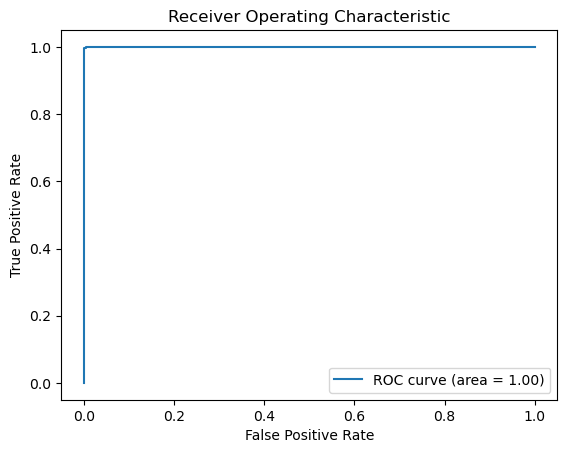

In [112]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

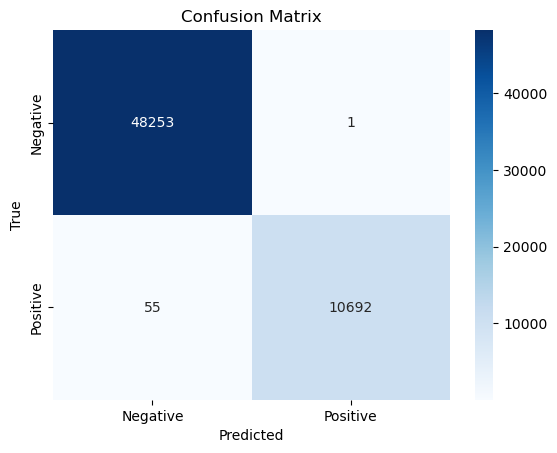

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

- True Negatives (TN): The model correctly predicted 48,253 instances of class 0.
- False Positives (FP): The model incorrectly predicted 1 instance as class 1 when it was actually class 0.
- False Negatives (FN): The model missed 55 instances of class 1, predicting them as class 0.
- True Positives (TP): The model correctly predicted 10,692 instances of class 1.

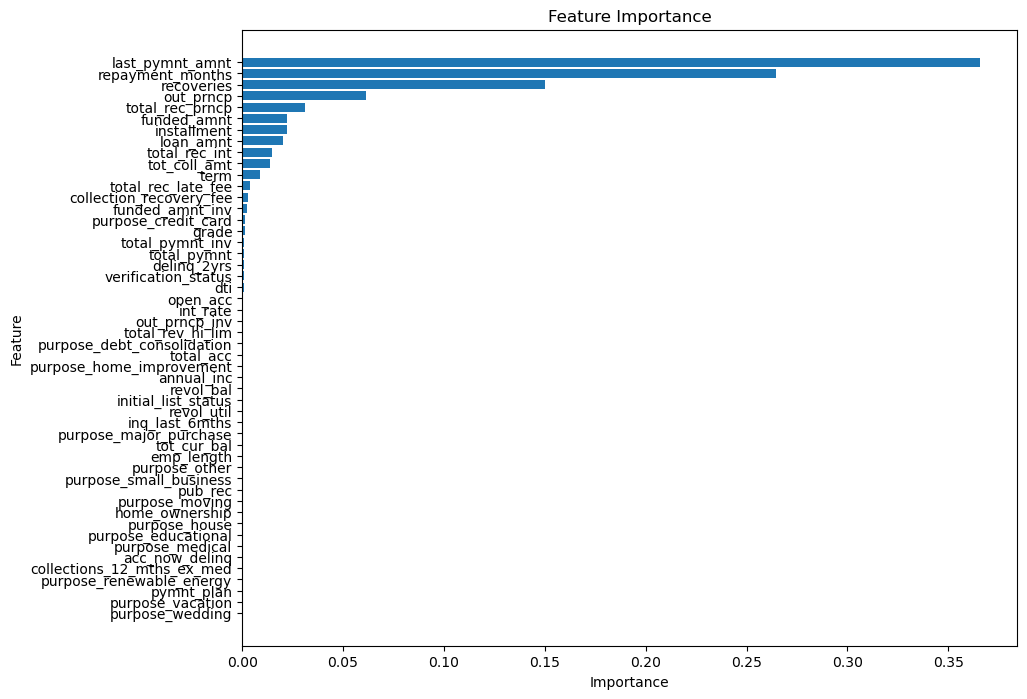

In [114]:
# Get feature importance
importance = xgb_model.feature_importances_

# Create a DataFrame for better visualization
import pandas as pd
feature_names = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

The top 5 feature importance are:
- `last_pymnt_amnt`: the amount of the last payment made is a key factor in predicting the target variable.
- `repayment_months`: longer repayment periods could influence the risk associated with the loan or credit.
- `recoveries`: the amount recovered from the loan or credit could be indicative of the financial health or recovery capacity of the borrower.
- `out_prncp`: higher outstanding principal amounts could imply higher risk or a greater potential loss.
- `total_rec_prncp`: the total amount of principal that has been recovered may reflect the borrower’s payment history and recovery trend.